In [1]:
import numpy as np

from signum import TimeDomainSignal
from signum.plotting import get_plotter

In [2]:
s1 = TimeDomainSignal(np.random.rand(10) + 1j * np.random.rand(10), f_sampling=0.5, description='Random data')

x2 = np.arange(-1, 20, 0.1)
s2 = TimeDomainSignal(np.sin(x2) + 1j * np.cos(x2)/2, description="sinusoid", x_axis=x2)

x3 = np.arange(20, step=0.1)
s3 = TimeDomainSignal(x3/20 * (np.cos(x3) + 1j * np.sin(x3)), x_axis=x3, description='curl')

In [3]:
def plot_lines(plotter):
    plotter.add_line(s1, marker='d', linestyle=':')
    plotter.add_line(s2, label='sin/cos', lw=1, linestyle='--')
    plotter.add_line(s3, label='Spiral', color='crimson', lw=1)

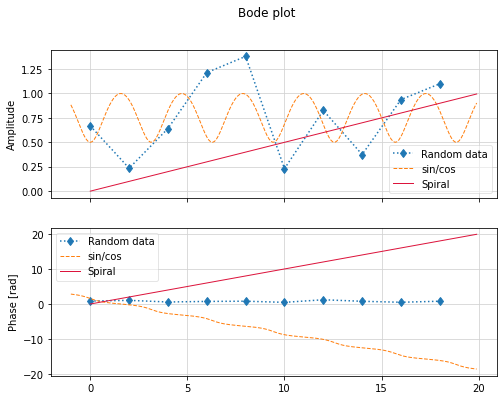

In [4]:
bode_plot = get_plotter('bode', title='Bode plot', unwrapped=True, rad=True)
plot_lines(bode_plot)

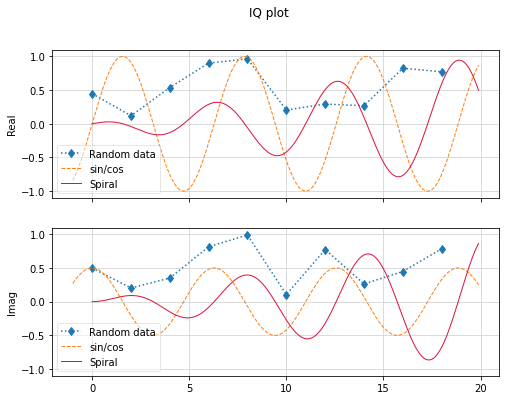

In [5]:
plot_lines(get_plotter('iq', title='IQ plot'))

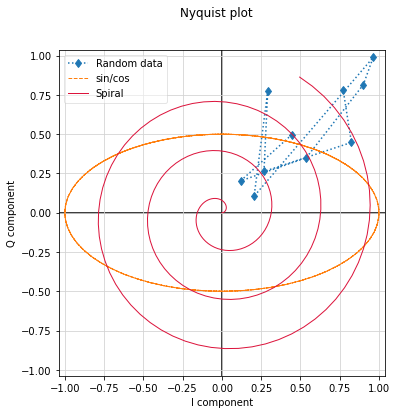

In [6]:
plot_lines(get_plotter('nyquist', title='Nyquist plot'))

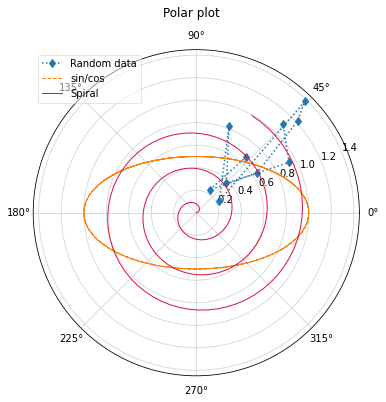

In [7]:
plot_lines(get_plotter('polar', title='Polar plot'))

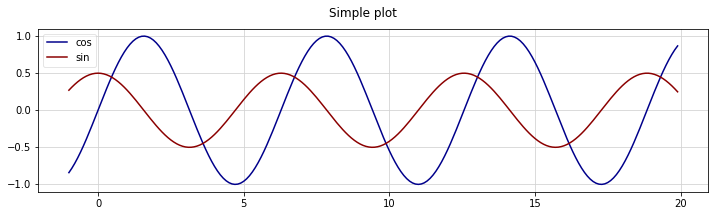

In [8]:
simple_plotter = get_plotter('simple', title='Simple plot', figsize=(12, 3))
simple_plotter.add_line(s2.real, label='cos', color='darkblue')
simple_plotter.add_line(s2.imag, label='sin', color='darkred')